In [1]:
import tensorflow as tf
from tensorflow import keras
from gan import GAN
from init import *

autotime loaded.


In [2]:
class GenerativeModel(object):
    def __init__(self, x_train): 
        self.x_train = x_train        
        _, self.img_rows, self.img_cols, self.channel = x_train.shape
        self.DCGAN = GAN(self.img_rows, self.img_cols)
        self.discriminator =  self.DCGAN.discriminator_model()
        self.adversarial = self.DCGAN.adversarial_model()
        self.generator = self.DCGAN.generator()

    def train(self, train_steps=2000, batch_size=256, save_interval=0):
        noise_input = None
        if save_interval>0:
            noise_input = np.random.uniform(-1.0, 1.0, size=[16, 100])
        for i in range(train_steps):
            images_train = self.x_train[np.random.randint(0,
                self.x_train.shape[0], size=batch_size), :, :, :]
            noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
            images_fake = self.generator.predict(noise)
            x = np.concatenate((images_train, images_fake))
            y = np.ones([2*batch_size, 1])
            y[batch_size:, :] = 0
            d_loss = self.discriminator.train_on_batch(x, y)

            y = np.ones([batch_size, 1])
            noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
            a_loss = self.adversarial.train_on_batch(noise, y)
            log_mesg = "%d: [D loss: %f, acc: %f]" % (i, d_loss[0], d_loss[1])
            log_mesg = "%s  [A loss: %f, acc: %f]" % (log_mesg, a_loss[0], a_loss[1])
            print(log_mesg)
            if save_interval>0:
                if (i+1)%save_interval==0:
                    self.plot_images(save2file=True, samples=noise_input.shape[0],\
                                     noise=noise_input, step=(i+1))

    def plot_images(self, save2file=False, fake=True, samples=16, noise=None, step=0):
        filename = './figs/mnist.png'
        if fake:
            if noise is None:
                noise = np.random.uniform(-1.0, 1.0, size=[samples, 100])
            else:
                filename = "./figs/mnist_%d.png" % step
            images = self.generator.predict(noise)
        else:
            i = np.random.randint(0, self.x_train.shape[0], samples)
            images = self.x_train[i, :, :, :]

        plt.figure(figsize=(10,10))
        for i in range(images.shape[0]):
            plt.subplot(4, 4, i+1)
            image = images[i, :, :, :]
            image = np.reshape(image, [self.img_rows, self.img_cols])
            plt.imshow(image, cmap='gray')
            plt.axis('off')
        plt.tight_layout()
        if save2file:
            plt.savefig(filename)
            plt.close('all')
        else:
            plt.show()

time: 6.35 ms


In [3]:
data = keras.datasets.mnist.load_data()[0][0]
data = np.expand_dims(data, -1).astype("float32") / 255
model = GenerativeModel(data)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "Discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
______________________________________

In [4]:
model.train(train_steps=1000, batch_size=256, save_interval=100)

0: [D loss: 0.692765, acc: 0.505859]  [A loss: 0.898017, acc: 0.000000]
1: [D loss: 0.656942, acc: 0.500000]  [A loss: 0.841465, acc: 0.000000]
2: [D loss: 0.559883, acc: 1.000000]  [A loss: 0.722053, acc: 0.312500]
3: [D loss: 0.496521, acc: 0.500000]  [A loss: 1.104102, acc: 0.000000]
4: [D loss: 0.400987, acc: 0.994141]  [A loss: 0.454255, acc: 1.000000]
5: [D loss: 0.230181, acc: 1.000000]  [A loss: 0.155492, acc: 1.000000]
6: [D loss: 0.156674, acc: 1.000000]  [A loss: 0.074632, acc: 1.000000]
7: [D loss: 0.105886, acc: 1.000000]  [A loss: 0.031525, acc: 1.000000]
8: [D loss: 0.085447, acc: 1.000000]  [A loss: 0.012655, acc: 1.000000]
9: [D loss: 0.070825, acc: 1.000000]  [A loss: 0.009446, acc: 1.000000]
10: [D loss: 0.063245, acc: 1.000000]  [A loss: 0.005963, acc: 1.000000]
11: [D loss: 0.056527, acc: 0.998047]  [A loss: 0.002634, acc: 1.000000]
12: [D loss: 0.048844, acc: 1.000000]  [A loss: 0.002383, acc: 1.000000]
13: [D loss: 0.041596, acc: 1.000000]  [A loss: 0.002847, acc

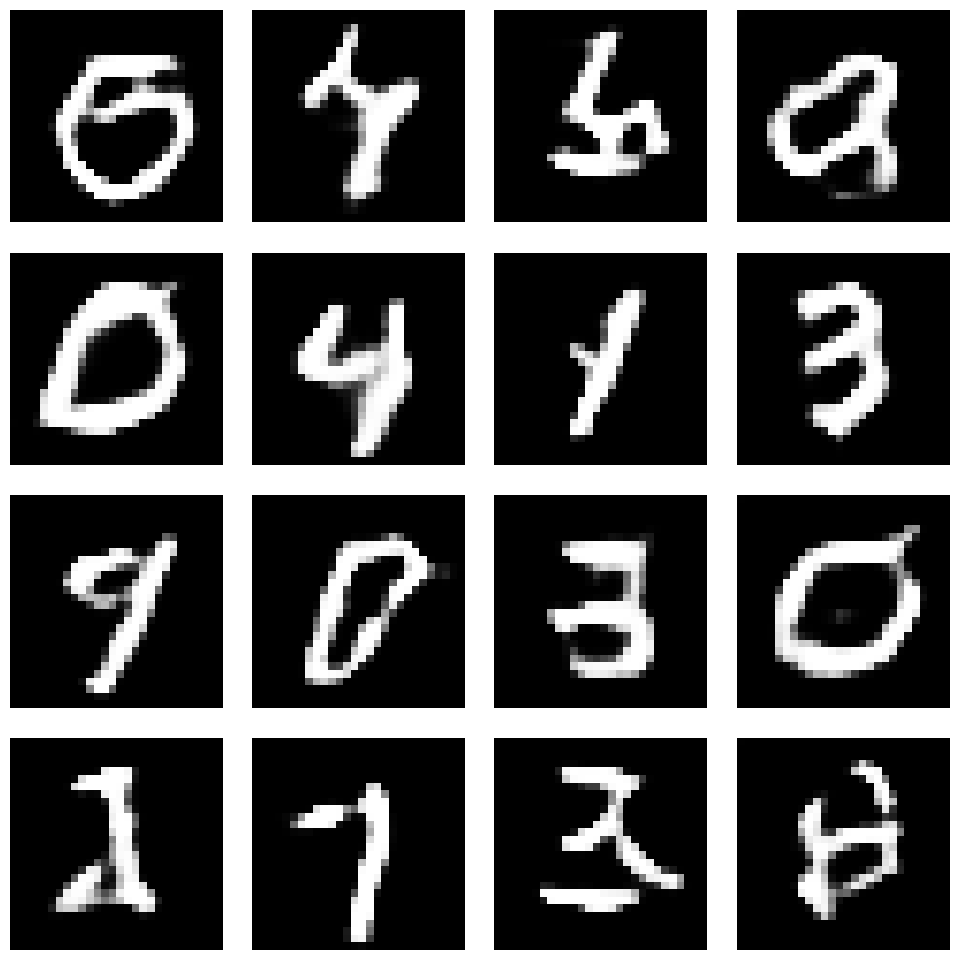

time: 925 ms


In [5]:
model.plot_images(fake=True)

In [6]:
model.plot_images(fake=False, save2file=True)

time: 532 ms
